# Sentiment Analysis Nuts and Bolts

In [1]:
import pandas as pd

## Movie reviews

In [2]:
movies = pd.read_csv('IMDB_sample.csv').iloc[:,1:]
movies

,review,label
0,This short spoof can be found on Elite's Mille...,0
1,A singularly unfunny musical comedy that artif...,0
2,"An excellent series, masterfully acted and dir...",1
3,The master of movie spectacle Cecil B. De Mill...,1
4,I was gifted with this movie as it had such a ...,0
...,...,...
7496,Although this film is somewhat filled with eig...,1
7497,Bo Derek's beauty and John Derek's revolutiona...,1
7498,I have seen every episode of this spin off. I ...,0
7499,"A comedy gem. Lots of laugh out loud moments, ...",1


In [3]:
movies.label.value_counts()

0    3782
1    3719
Name: label, dtype: int64

In [4]:
movies.label.value_counts()/len(movies)

0    0.504199
1    0.495801
Name: label, dtype: float64

In [5]:
length_reviews = movies.review.str.len()
max(length_reviews), min(length_reviews)

(10321, 52)

## Amazon reviews

In [6]:
amazon = pd.read_csv('amazon_reviews_sample.csv').iloc[:,1:]
amazon

,score,review
0,1,Stuning even for the non-gamer: This sound tr...
1,1,The best soundtrack ever to anything.: I'm re...
2,1,Amazing!: This soundtrack is my favorite musi...
3,1,Excellent Soundtrack: I truly like this sound...
4,1,"Remember, Pull Your Jaw Off The Floor After H..."
...,...,...
9995,1,A revelation of life in small town America in...
9996,1,Great biography of a very interesting journal...
9997,0,Interesting Subject; Poor Presentation: You'd...
9998,0,Don't buy: The box looked used and it is obvi...


## Tweet reviews

In [7]:
tweets = pd.read_csv('Tweets.csv')
tweets

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


## Sentiment analysis types and approaches

Levels of granularity
1. Document level
2. Sentence level
3. Aspect level

Type of sentiment analysis algorithms
1) Rule/lexicon-based
2) Automatic/Machine Learning

### What is the valence of a sentence?

In [8]:
from textblob import TextBlob
text = "Today was a good day"
my_valence = TextBlob(text).sentiment
my_valence

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

The sentiment property returns a tuple: polarity, which is measured on the scale from [-1.0 to 1.0], where -1.0 is very negative, 0 is neutral and +1.0 is very positive.

Our example 'Today was a good day' carries positive emotion and thus will have a positive polarity score: 0.7.

The second element in the tuple displays the subjectivity, measured from [0.0 to 1.0] where 0.0 is very objective and 1.0 is very subjective.

So our example is rather positive and subjective. 

### Automated or rule-based?

Automated/Machine learning

* Rely on having labelled historical data
* Might take a while to train
* Latest machine learning models can be quite powerful

Rule/lexicon-based

* Rely on manually created rules or dictionaries that craft valence scores
* Different words might have different polarity in different contexts
* Can be quite fast

> Many people find that a hybrid approach tends to work best in many, usually complex scenarios.

### Detecing the sentiment of Tale of Two Cities

In [9]:
two_cities = 'It was the best of times, it was the worst of times, it was the age of wisdom, it was the age of foolishness, it was the epoch of belief, it was the epoch of incredulity, it was the season of Light, it was the season of Darkness, it was the spring of hope, it was the winter of despair, we had everything before us, we had nothing before us, we were all going direct to Heaven, we were all going direct the other way – in short, the period was so far like the present period, that some of its noisiest authorities insisted on its being received, for good or for evil, in the superlative degree of comparison only.'
TextBlob(two_cities).sentiment

Sentiment(polarity=0.022916666666666658, subjectivity=0.5895833333333332)

### Comparing the sentiment of two string

In [10]:
annak = 'Happy families are all alike; every unhappy family is unhappy in its own way'
catcher = "If you really want to hear about it,the first thing you'll probably want to know is where I was born, and what my lousy childhood was like, and how my parents were occupied and all before they had me, and all that David Copperfield kind of crap, but I don't feel like going into it, if you want to know the truth."

In [11]:
# Create a textblob object 
blob_annak = TextBlob(annak)
blob_catcher = TextBlob(catcher)

# Print out the sentiment   
print('Sentiment of annak: ', blob_annak.sentiment)
print('Sentiment of catcher: ', blob_catcher.sentiment)

Sentiment of annak:  Sentiment(polarity=0.05000000000000002, subjectivity=0.95)
Sentiment of catcher:  Sentiment(polarity=-0.05, subjectivity=0.5466666666666666)


### What is a sentiment of a movie review?

In [12]:
titanic = "Titanic directed by James Cameron presents a fictional love story on the historical setting of the Titanic. The plot is simple, noncomplicated, or not for those who love plots that twist and turn and keep you in suspense. The end of the movie can be figured out within minutes of the start of the film, but the love story is an interesting one, however. Kate Winslett is wonderful as Rose, an aristocratic young lady betrothed by Cal (Billy Zane). Early on the voyage Rose meets Jack (Leonardo DiCaprio), a lower class artist on his way to America after winning his ticket aboard Titanic in a poker game. If he wants something, he goes and gets it unlike the upper class who are so concerned with their social worries. The two fall in love and the audience sees the sinking of the Titanic primarily through their eyes.<br /><br />The movie begins in modern times with the exploration of the wreck by a group searching for treasures, that sunk with the Titanic, which has recently occurred. One of the survivors of the Titanic, Rose DeWitt Bukater, who had heard of the exploration of the wreck on television and is flown to the boat where the search is being led from to tell of what she remembers to help the search. She gets to telling her memory of the one and only voyage of the Titanic. With this, the scene shifts to Southhampton, Ireland where the Titanic set sail from on April 10, 1912 as all the passengers are boarding. After another stop on the Irish coast Titanic went out to see on its maiden voyage across the Atlantic bound for New York. Historically the first few days of the voyage went by uneventful, but the fictional plot of the story is developed during this time as Rose sees the hopeless entrapement of an engagement that she is in to the wealthy Cal Hockley and falls in love with third class passenger, Jack Dawson. Captain Smith alledgedly as shown in the movie was urged by the White Star Line Director to increase the speed of the ship so they would make the newspaper headlines and receive extra publicity by arriving in New York on Thursday night and not on Friday morning as planned. Smith then ordered the fateful decision going against his thirty-two years of experience to stretch the Titanic's legs out to full speed. The Titanic had reports that the waters in the Atlantic they were sailing in were full of icebergs, but they ignored these warnings and proceeded at full speed as shown in the movie. On April 15, 1912 at 11:39, an iceberg was sighted. They attempted to shut off the engines and turn the ship out of the path of the iceberg but there was not enough time and the ship hit the iceberg on the starboard side as depicted in the film. The portrayal of the many small holes in the side of the ship and not one large gash along the side is accurate. The crew of Titanic sent out distress calls and set off distress rockets as shown until 2:18 when the lights finally failed. The lights of the California were spotted six miles away but they failed to realize what was going on and did not respond to Titanic's many pleas for help. The California had tried earlier in the day to warn Titanic of the severe ice that had caused them to stop their trip but Titanic had brushed them off causing the California to turn off its radio and leave the Titanic on its own. The first class women and children were the first as depicted to be put into the twenty lifeboats that were on the ship. Overwhelmingly the third class passengers suffered the most amount of deaths of any class and the crew was hit hard in this tragedy too. The word of White Star Line employees and first class passengers was believed over that of second and third class passengers when authorities were trying to gain information of the sinking. Also, the metal that was used to build the Titanic has been found in recent years under conditions of severe cold, which were experienced the night Titanic sank to be extremely brittle. Overall, the basic plot is very accurate in its portayal of the events and the times at which these events took place on the Titanic.<br /><br />Many of the characters in the story were not real and created simply for the purpose of the movie or as composite characters to represent possible characteristics and ideas of people on the ship. The core group of Rose, Jack, Cal, and Rose's mother all were fictional characters added into the story as they represent different groups of people from the time. Yet many characters such as the Unsinkable Molly Brown; Captain Edward Smith; the ship designer, Thomas Andrew; the White Star Line Representative, Bruce Ismay; and all of the Titanic's officers were real. The maiden voyage was going to be Captain Edward Smith's last voyage anyway as he planned to retire afterwards. He had been a part of the White Star Line since 1880 where he worked his way up to his status as the Millionaire's Captain when the Titanic sunk. The portrayals of the officers is accurate as only four survived the tragedy except for the officer who threatened to kill all of the passengers of the ship with his pistol. He is on record as acting heroicly and was misportrayed to the point that James Cameron apologized and evoked a monument in his honor in the officer's former Canadian hometown. As shown in the movie there was a language problem between the crew and many of the lower-class passengers from non-English speaking nations. In addition, Officer Lowe was the only officer who came back in the lifeboat as depicted. The old people shown in their bed as the water came in their room were based on the Strauss'. Not wanting to leave her husband's side Mrs. Strauss refused to get in her lifeboat and died with her husband on the Titanic. Furthermore, Mr. Goggenheim who was shown sipping his brandy and smoking a cigar reportedly did go out like this dressed in his best. The richest man on the ship, John Jacob Astor, who owned most of Manhattan died nonetheless as well, but his much younger wife was saved in a lifeboat. In addition, Molly Brown was saved and later had medals made up for the crew of the Carpethia that picked the survivors of Titanic up from the water. Her ticket on the Titanic had cost over four-thousand dollars and by the end of her life she ended up broke. All of the interiors of the ship were masterfully replacated down to the last pieces of china and silverware. The gymnasium, which is hardly seen is recreated perfectly with all of the machines reproduced to match those seen in old photographs. The wonderful outfits and costuming were an excellent re-creation of the Post-Victorian era of 1912. The rich at this time practically ruled everything, as the women's suffrage movement had not quite gotten moving yet. Women during this time often married for financial security as Rose was considering doing and normally took a back seast status to their husbands as Cal wished for Rose to do. The rich did not take well to `new money' such as Molly Brown as depicted. Everything of the time was very formal. Women had to be escorted to dinner by a male figure as seen with in the dining scenes. Smoking was not very common among women of the time but holders of cigarettes, which were just coming in at the time were used as seen with Rose in the movie. Men of the time generally smoked cigars not cigarettes. Women were constained physically by their corsets and socially by society. Although James Cameron had no background in historical films he brought in experts of Titanic coupled with two years spent cross-referencing the history of the Titanic and few liberties were taken. The beautiful cinematography and special effects also helped to make the film even more breathtaking.<br /><br />A recognizable message can be seen in the movie Titanic as the people on the ship had about three hours to contemplate their demise. The director, James Cameron, shows the various reactions to this time of crisis in people's lives. Everyone reacts differently and he gets you to think of how you might have reacted had you been in that situation on the Titanic on that fateful night. In addition, this film is a reflection of the 1990's when it was produced as it gives a look into the wreck of the Titanic. Only in the past fifteen years has the site of the actual Titanic been found and explored. This movie was able to give us a deeper look into a disaster that many would not have viewed. However, the moral question of whether people today should be taking treasures from the wreck of an underwater graveyard is posed. There have been attempts to stop treasure seeking missions such as the one portrayed in Titanic but all have failed. As it stands today anyone can make a voyage to the Titanic and take whatever valuables they as portrayed in the film showing the general values of our time on this matter.<br /><br />Technically the film is very well done. To get footage of the wreck at the bottom of the ocean it took twelve dives to get all of the footage needed for the movie. In addition, a special camera had to be created to withstand the intense pressure at the bottom of the ocean. Cameron did not plan on using the probe to go as far inside Titanic as anyone has in the 88 years since the ship sunk but it worked out that this provided an unique perspective into the ship. Furthermore, throughout the film fade ins and outs from the wreck of Titanic to the scene of Titanic during its actual voyage. This shift between the modern scene to the past scene during the voyage works as an excellent transition that makes the story easy to follow in aclear manner. At the very beginning of the movie a septune recreation is used to recreate the scene when the actual people left the European coast on Titanic giving it distinction from the rest of the events of the film.<br /><br />Titanic plays almost like a historical biography and is like a work of art, a true epic. Like most history novels, we know the ending, but it doesn't take away from the wonderful treats that can be found in this picture. Certain aspects of this film are Academy Award material including costuming, sound, cintematography, and editing. If you like interesting characters that will give you an insight into the life of characters in the early 1900's and how they face disaster, then this movie definitely is for you.<br /><br />"

In [13]:
TextBlob(titanic).sentiment

Sentiment(polarity=0.2024748060772906, subjectivity=0.4518248900857597)

In [14]:
movies[movies.review==titanic]

,review,label
4930,Titanic directed by James Cameron presents a f...,1


### Wordcloud

Pros
* Can reveal the essential
* Provide an overall sense of the text
* Easy to grasp and engaging

Cons
* Sometimes confusing and uninformative
* With larger text, require more work

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [16]:
cloud_two_cities = WordCloud().generate(two_cities)
cloud_two_cities

In [17]:
?WordCloud

Init signature:
WordCloud(
    font_path=None,
    width=400,
    height=200,
    margin=2,
    ranks_only=None,
    prefer_horizontal=0.9,
    mask=None,
    scale=1,
    color_func=None,
    max_words=200,
    min_font_size=4,
    stopwords=None,
    random_state=None,
    background_color='black',
    max_font_size=None,
    font_step=1,
    mode='RGB',
    relative_scaling='auto',
    regexp=None,
    collocations=True,
    colormap=None,
    normalize_plurals=True,
    contour_width=0,
    contour_color='black',
    repeat=False,
    include_numbers=False,
    min_word_length=0,
    collocation_threshold=30,
)
Docstring:     
Word cloud object for generating and drawing.

Parameters
----------
font_path : string
    Font path to the font that will be used (OTF or TTF).
    Defaults to DroidSansMono path on a Linux machine. If you are on
    another OS or don't have this font, you need to adjust this path.

width : int (default=400)
    Width of the canvas.

height : int (default=2

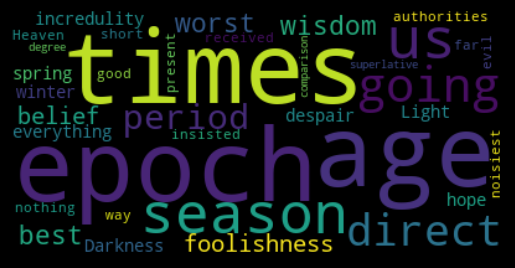

In [18]:
plt.imshow(cloud_two_cities, interpolation='bilinear')
plt.axis('off')
plt.show()

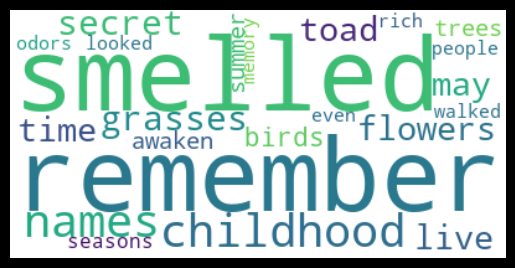

In [19]:
east_eden = 'I remember my childhood names for grasses and secret flowers. I remember where a toad may live and what time the birds awaken in the summer—and what trees and seasons smelled like—how people looked and walked and smelled even. The memory of odors is very rich.'
plt.imshow(WordCloud(background_color='white').generate(east_eden), interpolation='bilinear')
plt.axis('off')
plt.show()

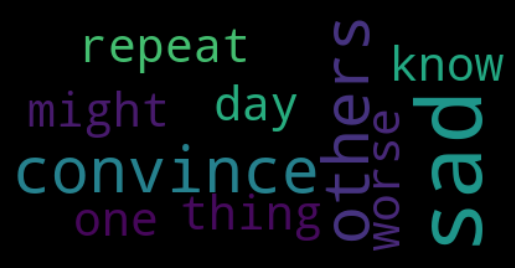

In [20]:
illuminated = 'I am not sad, he would repeat to himself over and over, I am not sad. As if he might one day convince himself or convince others -- the only thing worse than being sad is for others to know that you are sad. I am not sad.'
plt.imshow(WordCloud().generate(illuminated), interpolation='bilinear')
plt.axis('off')
plt.show()

In [21]:
my_stopwords = {'a',  'about',  'above',  'after', 'again', 'against', 'all',  'also',  'am',  'an', 'and',  'any',
                'are',  "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both',
                'br', 'but', 'by', 'can', "can't", 'cannot', 'com', 'could', "couldn't", 'did', "didn't", 'do', 'does',
                "doesn't", 'doing', "don't", 'down', 'during', 'each', 'else', 'ever', 'few', 'film', 'films', 'for',
                'from', 'further', 'get', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd",
                "he'll", "he's", 'hence', 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how',
                "how's", 'however', 'http', 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it',
                "it's", 'its', 'itself', 'just', 'k', "let's", 'like', 'me', 'more', 'most', 'movie', 'movies',
                "mustn't", 'my', 'myself', 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other',
                'otherwise', 'ought', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'r', 'same', 'shall', "shan't",
                'she', "she'd", "she'll", "she's", 'should', "shouldn't", 'since', 'so', 'some', 'such', 'than', 'that',
                "that's", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', "there's", 'therefore',
                'these', 'they', "they'd", "they'll", "they're", "they've", 'this', 'those', 'through', 'to', 'too',
                'under', 'until', 'up', 'very', 'was', "wasn't", 'watch', 'we', "we'd", "we'll", "we're", "we've",
                'were', "weren't", 'what', "what's", 'when', "when's", 'where', "where's", 'which', 'while', 'who',
                "who's", 'whom', 'why', "why's", 'with', "won't", 'would', "wouldn't", 'www', 'you', "you'd", "you'll",
                "you're", "you've", 'your', 'yours', 'yourself', 'yourselves'}

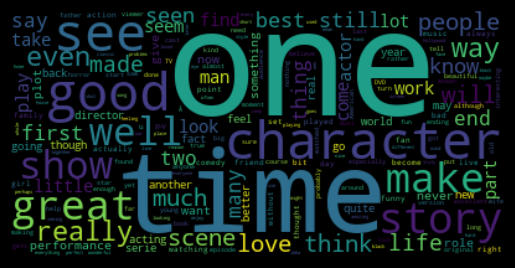

In [22]:
plt.imshow(WordCloud(stopwords=my_stopwords).generate(' '.join(movies.review[movies.label==1])), interpolation='bilinear')
plt.axis("off")
plt.show()

# Numeric Features from Reviews

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
annak = ['Happy families are all alike;', 'every unhappy family is unhappy in its own way']
annak

['Happy families are all alike;',
 'every unhappy family is unhappy in its own way']

In [25]:
anna_vect = CountVectorizer()
anna_vect.fit(annak)
anna_bow = anna_vect.transform(annak)
print(anna_bow.toarray())

[[1 1 1 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 1 1 1 1 2 1]]


## BOW limited to 1000 features

In [26]:
from sklearn.feature_extraction.text import CountVectorizer 
vect = CountVectorizer(max_features=100)
vect.fit(amazon.review)
X_review = vect.transform(amazon.review)
X_df=pd.DataFrame(X_review.A, columns=vect.get_feature_names_out())
print(X_df.head())

   about  after  all  also  am  an  and  any  are  as  ...  what  when  which  \
0      0      0    1     0   0   0    2    0    0   0  ...     0     0      0   
1      0      0    0     0   0   0    3    1    1   0  ...     0     0      0   
2      0      0    3     0   0   1    4    0    1   1  ...     0     0      1   
3      0      0    0     0   0   0    9    0    1   0  ...     0     0      0   
4      0      1    0     0   0   0    3    0    1   0  ...     0     0      0   

   who  will  with  work  would  you  your  
0    2     0     1     0      2    0     1  
1    0     0     0     0      1    1     0  
2    1     0     0     1      1    2     0  
3    0     0     0     0      0    0     0  
4    0     0     0     0      0    3     1  

[5 rows x 100 columns]


## Getting granular with n-grams

Capturing context with a BOW

In [27]:
vect = CountVectorizer(ngram_range=())

What is the best n?

It's not easy to determine what is the optimal sequence you should use for your problem. If we use longer token sequence, this will result in more features. In principle, the number of bigrams could be the number of unigrams squared; trigrams the number of unigrams to the power of 3 and so forth.

In general, having longer sequences results in more precise machine learning models, but this also increases the risk of overfitting. An approach to find the optimal sequence length would be to try different lengths in something like a grid search and see which results in the best model.

Specifying vocabulary size

Determining the length of token sequence is not the only way to determine the size of the vocabulary. There are a few parameters in the CountVectorizer that can also do that. You might remember we set the max_features parameter. The max_features can tell the CountVectorizer to take the top most frequent tokens in the corpus. If it is set to None, all the words in the corpus will be included. So this parameter can remove rare words, which depending on the context may or may not be a good idea.

Another parameter you can specify is max_df. If given, it tells CountVectorizer to ignore terms with a higher than the given frequency. We can specify it as an integer - which will be an absolute count, or float - which will be a proportion. The default value of max_df is 1.0, which means it does not ignore any terms. Very similar to max_df is min_df. It is used to remove terms that appear too infrequently. It again can be specified either as an integer, in which case it will be a count, or a float, in which case it will be a proportion. The default value is 1, which means "ignore terms that appear in less than 1 document". Thus, the default setting does not ignore any terms.

In [28]:
from sklearn.feature_extraction.text import CountVectorizer 
vect = CountVectorizer(ngram_range=(1,2))
vect.fit(amazon.review)
X_review = vect.transform(amazon.review)
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names_out())
print(X_df.head())

   00  00 and  00 apiece  00 as  00 back  00 bad  00 bucks  00 cheaper  00 do  \
0   0       0          0      0        0       0         0           0      0   
1   0       0          0      0        0       0         0           0      0   
2   0       0          0      0        0       0         0           0      0   
3   0       0          0      0        0       0         0           0      0   
4   0       0          0      0        0       0         0           0      0   

   00 does  ...  étai fidèle  était  était pas  étre  étre publié  éviter  \
0        0  ...            0      0          0     0            0       0   
1        0  ...            0      0          0     0            0       0   
2        0  ...            0      0          0     0            0       0   
3        0  ...            0      0          0     0            0       0   
4        0  ...            0      0          0     0            0       0   

   última  última parte  única  única opción  
0  

Size of vocabulary of movies reviews

In [33]:
vect = CountVectorizer(max_features=100)
vect.fit(movies.review)
X_review = vect.transform(movies.review)
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names_out())
X_df.head()

,about,after,all,also,an,and,any,are,as,at,...,well,were,what,when,which,who,will,with,would,you
0,0,0,0,0,0,1,0,0,2,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,3,1,1,11,0,3,3,4,...,0,0,1,1,2,0,2,7,2,3
2,0,1,0,0,1,7,0,1,2,1,...,0,0,0,0,0,0,0,2,0,0
3,0,0,0,0,2,1,0,1,2,2,...,1,0,0,0,0,1,0,0,0,1
4,0,0,3,0,0,8,0,3,1,0,...,2,1,0,1,1,0,0,2,0,0


In [35]:
vect = CountVectorizer(max_df=200)
vect.fit(movies.review)
X_review = vect.transform(movies.review)
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names_out())
X_df.head()

,00,000,000s,007,0080,0083,0093638,00am,00pm,00s,...,zukovic,zulu,zuniga,zvyagvatsev,zwick,zx81,zy,zzzzzzzzzzzz,zzzzzzzzzzzzz,â½
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
vect = CountVectorizer(min_df=50)
vect.fit(movies.review)
X_review = vect.transform(movies.review)
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names_out())
X_df.head()

,000,10,100,11,12,13,14,15,1950,1980,...,york,you,young,younger,your,yourself,youth,zero,zombie,zombies
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,3,0,0,2,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [40]:
vect = CountVectorizer(max_features=1000, ngram_range=(2, 2), max_df=500)
vect.fit(amazon.review)
X_review = vect.transform(amazon.review)
X_df = pd.DataFrame(X_review.A, columns=vect.get_feature_names_out())
X_df.head()

,able to,about how,about it,about the,about this,after reading,after the,again and,ago and,agree with,...,you think,you to,you ve,you want,you will,you won,you would,your money,your own,your time
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Build new features from text

In [42]:
from nltk import word_tokenize

In [48]:
anna_k = 'Happy families are all alike, every unhappy family is unhappy in its own way.'
print(word_tokenize(anna_k))

['Happy', 'families', 'are', 'all', 'alike', ',', 'every', 'unhappy', 'family', 'is', 'unhappy', 'in', 'its', 'own', 'way', '.']


In [49]:
word_tokens = [word_tokenize(review) for review in amazon.review]
type(word_tokens)

list

In [50]:
type(word_tokens[0])

list

Generating a feature of the number of tokens per document (review)

Dealing with punctuation
* We did not address it but you can exclude it
* A feature that measures the number of punctuation signs
* A review with many punctuation signs could signal a very emotionally charged opinion

In [58]:
GoT = 'Never forget what you are, for surely the world will not. Make it your strength. Then it can never be your weakness. Armour yourself in it, and it will never be used to hurt you.'
print(word_tokenize(GoT))

['Never', 'forget', 'what', 'you', 'are', ',', 'for', 'surely', 'the', 'world', 'will', 'not', '.', 'Make', 'it', 'your', 'strength', '.', 'Then', 'it', 'can', 'never', 'be', 'your', 'weakness', '.', 'Armour', 'yourself', 'in', 'it', ',', 'and', 'it', 'will', 'never', 'be', 'used', 'to', 'hurt', 'you', '.']


In [60]:
avengers = ["Cause if we can't protect the Earth, you can be d*** sure we'll avenge it",
 'There was an idea to bring together a group of remarkable people, to see if we could become something more',
 "These guys come from legend, Captain. They're basically Gods."]
print([word_tokenize(item) for item in avengers])

[['Cause', 'if', 'we', 'ca', "n't", 'protect', 'the', 'Earth', ',', 'you', 'can', 'be', 'd', '*', '*', '*', 'sure', 'we', "'ll", 'avenge', 'it'], ['There', 'was', 'an', 'idea', 'to', 'bring', 'together', 'a', 'group', 'of', 'remarkable', 'people', ',', 'to', 'see', 'if', 'we', 'could', 'become', 'something', 'more'], ['These', 'guys', 'come', 'from', 'legend', ',', 'Captain', '.', 'They', "'re", 'basically', 'Gods', '.']]


In [61]:
word_tokens = [word_tokenize(review) for review in amazon.review]
# Print out the first item of the word_tokens list
print(word_tokens[0])

['Stuning', 'even', 'for', 'the', 'non-gamer', ':', 'This', 'sound', 'track', 'was', 'beautiful', '!', 'It', 'paints', 'the', 'senery', 'in', 'your', 'mind', 'so', 'well', 'I', 'would', 'recomend', 'it', 'even', 'to', 'people', 'who', 'hate', 'vid', '.', 'game', 'music', '!', 'I', 'have', 'played', 'the', 'game', 'Chrono', 'Cross', 'but', 'out', 'of', 'all', 'of', 'the', 'games', 'I', 'have', 'ever', 'played', 'it', 'has', 'the', 'best', 'music', '!', 'It', 'backs', 'away', 'from', 'crude', 'keyboarding', 'and', 'takes', 'a', 'fresher', 'step', 'with', 'grate', 'guitars', 'and', 'soulful', 'orchestras', '.', 'It', 'would', 'impress', 'anyone', 'who', 'cares', 'to', 'listen', '!', '^_^']


In [62]:
# Create a new feature for the lengh of each review
amazon['n_words'] = [len(word_token) for word_token in amazon.review]

## Can you guess the language?

In [88]:
from langdetect import detect_langs
foreign = "Este libro ha sido uno de los mejores libros que he leido. L'histoire rendu était fidèle, excellent, et grande."
detect_langs(foreign)

[es:0.7142456630827754, fr:0.2857497033226664]

In [89]:
str(detect_langs(foreign)[0]).split(':')[0]

'fr'

Building a feature for the language

In [90]:
amazon['language'] = amazon.review.apply(lambda review: str(detect_langs(review)[0]).split(':')[0])
amazon

,score,review,n_words,language
0,1,Stuning even for the non-gamer: This sound tr...,429,en
1,1,The best soundtrack ever to anything.: I'm re...,512,en
2,1,Amazing!: This soundtrack is my favorite musi...,763,en
3,1,Excellent Soundtrack: I truly like this sound...,746,en
4,1,"Remember, Pull Your Jaw Off The Floor After H...",484,en
...,...,...,...,...
9995,1,A revelation of life in small town America in...,870,en
9996,1,Great biography of a very interesting journal...,864,en
9997,0,Interesting Subject; Poor Presentation: You'd...,653,en
9998,0,Don't buy: The box looked used and it is obvi...,138,en


In [107]:
sentences = ["L'histoire rendu était fidèle, excellent, et grande.",
             'Excelente muy recomendable.',
             'It had a leak from day one but the return and exchange process was very quick.']
print([detect_langs(sentence) for sentence in sentences])

[[fr:0.9999975113858144], [es:0.9999956018926963], [en:0.9999982514036153]]


Language detection for other languages

In [118]:
non_english_reviews = amazon[amazon.language!='en'].copy()
non_english_reviews['language'] = non_english_reviews.review.apply(lambda review: str(detect_langs(review)[0]).split(':')[0])
non_english_reviews

,score,review,n_words,language
169,1,Awesume! BEST BLOCKS EVER!: THIS TOY WAS OUR ...,162,de
881,1,Good read................. ............... .....,282,en
1249,1,Il grande ritorno!: E' dai tempi del tour di ...,902,it
1259,1,La reencarnación vista por un científico: El ...,195,es
1260,1,Excelente Libro / Amazing book!!: Este libro ...,548,es
1261,1,Magnifico libro: Brian Weiss ha dejado una ma...,282,es
1639,1,El libro mas completo que existe para nosotra...,191,es
1745,1,Excelente!: Una excelente guía para todos aqu...,303,es
2316,1,Nightwish is unique and rocks for eva: Moi to...,258,fr
2486,1,Palabras de aliento para tu caminar con Dios:...,467,es


# More on Numeric Vectors: Transforming Tweets

In [128]:
from nltk.stem import WordNetLemmatizer
[(word, WordNetLemmatizer().lemmatize(word)) for word in ['movie', 'movies', 'film', 'films', 'cinema']]

[('movie', 'movie'),
 ('movies', 'movie'),
 ('film', 'film'),
 ('films', 'film'),
 ('cinema', 'cinema')]

## Stop words with word clouds

In [157]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('dark_background')

Wordcloud, not removing any stop words

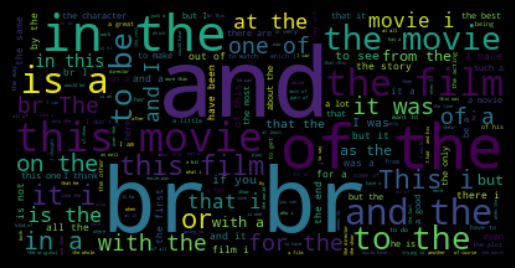

In [153]:
plt.imshow(WordCloud(random_state=1, stopwords='').generate(' '.join(movies.review)), interpolation='bilinear')
plt.axis('off')
plt.show()

Wordcloud, removing default stop words

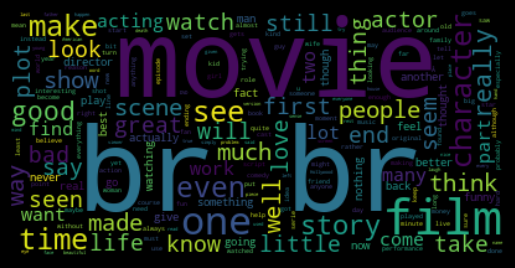

In [154]:
plt.imshow(WordCloud(random_state=1).generate(' '.join(movies.review)), interpolation='bilinear')
plt.axis('off')
plt.show()

Wordcloud removing additional custom stop words

In [155]:
from wordcloud import STOPWORDS

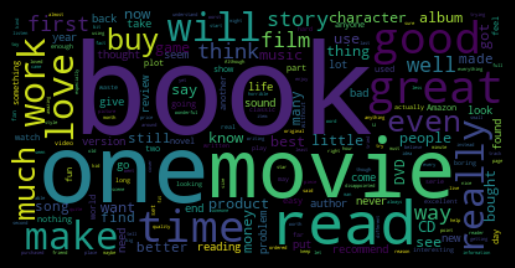

In [156]:
plt.imshow(WordCloud(random_state=1, stopwords=set(STOPWORDS).update(["movie", "movies", "film", "films", "watch", "br"])).generate(' '.join(amazon.review)), interpolation='bilinear')
plt.axis('off')
plt.show()

## Stop words with BOW

In [163]:
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
vect = CountVectorizer(stop_words=list(ENGLISH_STOP_WORDS.union(['film', 'movie', 'cinema', 'theatre'])))
vect.fit(movies.review)
X = vect.transform(movies.review)
pd.DataFrame(X.A, columns=vect.get_feature_names_out())

,00,000,000s,007,0080,0083,0093638,00am,00pm,00s,...,zukovic,zulu,zuniga,zvyagvatsev,zwick,zx81,zy,zzzzzzzzzzzz,zzzzzzzzzzzzz,â½
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Word cloud of tweets

With default stopwords

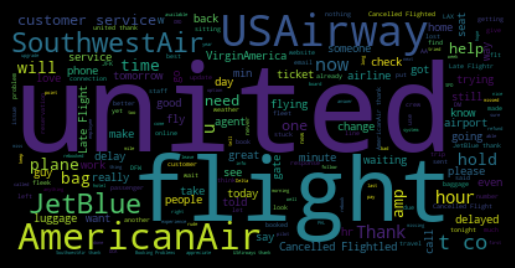

In [180]:
text_tweet = ' '.join(tweets.text)
plt.imshow(WordCloud(random_state=1).generate(text_tweet), interpolation='bilinear')
plt.axis('off')
plt.show()

With additional stopwords

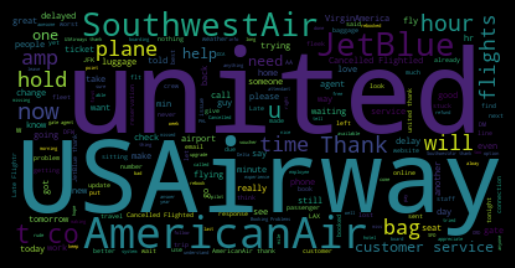

In [183]:
my_stop_words = STOPWORDS.update(['airline', 'airplane', 'flight'])
my_cloud = WordCloud(random_state=1, stopwords=my_stop_words).generate(text_tweet)
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")
plt.show()

## Airline sentiment with stop words

In [191]:
my_stop_words = list(ENGLISH_STOP_WORDS.union(['airline', 'airlines', '@']))
vect = CountVectorizer(stop_words=my_stop_words)
vect.fit(tweets.text)
X_review = vect.transform(tweets.text)
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names_out())
X_df

,00,000,000114,000419,000ft,000lbs,0011,0016,00a,00am,...,zrh_airport,zsdgzydnde,zsuztnaijq,ztrdwv0n4l,zukes,zurich,zv2pt6trk9,zv6cfpohl5,zvfmxnuelj,zzps5ywve2
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14636,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14637,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Multiple text columns

In [206]:
my_stop_words = list(ENGLISH_STOP_WORDS.union(['airline', 'airlines', '@', 'am', 'pm']))
vect1 = CountVectorizer(stop_words=my_stop_words)
vect2 = CountVectorizer(stop_words=list(ENGLISH_STOP_WORDS)) 
vect1.fit(tweets.text)
vect2.fit(tweets.negativereason.dropna())
print(vect1.get_feature_names_out()[-15:])
print(vect2.get_feature_names_out())

['zoom' 'zouowgv3q6' 'zpz78poeon' 'zqutus7epw' 'zrh' 'zrh_airport'
 'zsdgzydnde' 'zsuztnaijq' 'ztrdwv0n4l' 'zukes' 'zurich' 'zv2pt6trk9'
 'zv6cfpohl5' 'zvfmxnuelj' 'zzps5ywve2']
['attendant' 'bad' 'booking' 'cancelled' 'complaints' 'customer' 'damaged'
 'flight' 'issue' 'late' 'longlines' 'lost' 'luggage' 'problems' 'service'
 'tell']


## Capturing a token pattern

In [219]:
# Original word tokenization
word_tokens = [word_tokenize(review) for review in movies.review]
print(len(word_tokens[0]))
# Keeping only tokens composed of letters
cleaned_tokens = [[word for word in item if word.isalpha()] for item in word_tokens]
len(cleaned_tokens[0])

155


124

Specify the token pattern

In [222]:
vect = CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]+\b').fit(tweets.text)
vect.transform(tweets.text)
print('Length of vectorizer: ', len(vect.get_feature_names_out()))

Length of vectorizer:  11893


In [224]:
vect1 = CountVectorizer().fit(tweets.text)
vect1.transform(tweets.text)
vect2 = CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]').fit(tweets.text)
vect2.transform(tweets.text)
print('Length of vectorizer 1: ', len(vect1.get_feature_names_out()))
print('Length of vectorizer 2: ', len(vect2.get_feature_names_out()))

Length of vectorizer 1:  15051
Length of vectorizer 2:  643


In [225]:
word_tokens = [word_tokenize(review) for review in tweets.text]
print('Original tokens: ', word_tokens[0])
cleaned_tokens = [[word for word in item if word.isalpha()] for item in word_tokens]
print('Cleaned tokens: ', cleaned_tokens[0])

Original tokens:  ['@', 'VirginAmerica', 'What', '@', 'dhepburn', 'said', '.']
Cleaned tokens:  ['VirginAmerica', 'What', 'dhepburn', 'said']


In [227]:
tweets_list = ["@VirginAmerica it's really aggressive to blast obnoxious 'entertainment' in your guests' faces &amp; they have little recourse",
               "@VirginAmerica Hey, first time flyer next week - excited! But I'm having a hard time getting my flights added to my Elevate account. Help?",
               '@united Change made in just over 3 hours. For something that should have taken seconds online, I am not thrilled. Loved the agent, though.']
tokens = [word_tokenize(item) for item in tweets_list]
letters = [[word for word in item if word.isalpha()] for item in tokens]
let_digits = [[word for word in item if word.isalnum()] for item in tokens]
digits = [[word for word in item if word.isdigit()] for item in tokens]
print('Last item in alphabetic list: ', letters[2])
print('Last item in list of alphanumerics: ', let_digits[2])
print('Last item in the list of digits: ', digits[2])

Last item in alphabetic list:  ['united', 'Change', 'made', 'in', 'just', 'over', 'hours', 'For', 'something', 'that', 'should', 'have', 'taken', 'seconds', 'online', 'I', 'am', 'not', 'thrilled', 'Loved', 'the', 'agent', 'though']
Last item in list of alphanumerics:  ['united', 'Change', 'made', 'in', 'just', 'over', '3', 'hours', 'For', 'something', 'that', 'should', 'have', 'taken', 'seconds', 'online', 'I', 'am', 'not', 'thrilled', 'Loved', 'the', 'agent', 'though']
Last item in the list of digits:  ['3']


## Stemming and lemmatization

Stemming vs. lemmatization

Stemming
* Produces roots of words
* Fast and efficient to compute

Lemmatization
* Produces actual words
* Slower than stemming and can depend on the part-of-speech

One popular stemming library is the PorterStemmer in the nltk.stem package. The PorterStemmer is not the only stemmer in nltk but it's quite fast and easy to use, so it's often a standard choice. 

In [231]:
from nltk.stem import PorterStemmer
PorterStemmer().stem('wonderful')

'wonder'

Stemming is possible using other languages as well, such as Danish, Dutch, French, Spanish, German, etc. To use foreign language stemmers we need to use the SnowballStemmer package.

In [232]:
from nltk.stem.snowball import SnowballStemmer
SnowballStemmer('dutch').stem('beginnen')

'beginn'

How to stem a sentence?

In [234]:
# Don't,
PorterStemmer().stem('Today is a wonderful day!')

'today is a wonderful day!'

In [235]:
# Do
[PorterStemmer().stem(word) for word in word_tokenize('Today is a wonderful day!')]

['today', 'is', 'a', 'wonder', 'day', '!']

Lemmatization of a string

Note that we have specified a part-of-speech, given by the 'pos' argument. The default pos is noun, or 'n'. Here we specify an adjective, that's why pos = 'a'.

In [240]:
from nltk.stem import WordNetLemmatizer
[WordNetLemmatizer().lemmatize(word) for word in word_tokenize('Today is a wonderful day!')]

['Today', 'is', 'a', 'wonderful', 'day', '!']

In [246]:
WordNetLemmatizer().lemmatize('wonderful', pos='a')

'wonderful'

## Stem and lemmas from GoT

In [254]:
porter = PorterStemmer()
WNlemmatizer = WordNetLemmatizer()
tokens = word_tokenize(GoT) 

In [251]:
import time
start_time = time.time()
stemmed_tokens = [PorterStemmer().stem(token) for token in tokens] 
end_time = time.time()
print('Time taken for stemming in seconds: ', end_time - start_time)
print('Stemmed tokens: ', stemmed_tokens) 

Time taken for stemming in seconds:  0.0003681182861328125
Stemmed tokens:  ['never', 'forget', 'what', 'you', 'are', ',', 'for', 'sure', 'the', 'world', 'will', 'not', '.', 'make', 'it', 'your', 'strength', '.', 'then', 'it', 'can', 'never', 'be', 'your', 'weak', '.', 'armour', 'yourself', 'in', 'it', ',', 'and', 'it', 'will', 'never', 'be', 'use', 'to', 'hurt', 'you', '.']


In [252]:
start_time = time.time()
lem_tokens = [WordNetLemmatizer().lemmatize(token) for token in tokens]
end_time = time.time()
print('Time taken for lemmatizing in seconds: ', end_time - start_time)
print('Lemmatized tokens: ', lem_tokens) 

Time taken for lemmatizing in seconds:  0.00011897087097167969
Lemmatized tokens:  ['Never', 'forget', 'what', 'you', 'are', ',', 'for', 'surely', 'the', 'world', 'will', 'not', '.', 'Make', 'it', 'your', 'strength', '.', 'Then', 'it', 'can', 'never', 'be', 'your', 'weakness', '.', 'Armour', 'yourself', 'in', 'it', ',', 'and', 'it', 'will', 'never', 'be', 'used', 'to', 'hurt', 'you', '.']


In [ ]:
%timeit [PorterStemmer().stem(token) for token in tokens] 
%timeit [WordNetLemmatizer().lemmatize(token) for token in tokens]

297 µs ± 1.19 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
54.9 µs ± 127 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


## Stem Spanish reviews

In [261]:
# languages = [] 
# for i in range(len(non_english_reviews)):
#     languages.append(detect_langs(non_english_reviews.iloc[i, 1]))

# # Clean the list by splitting     
# languages = [str(lang).split(':')[0][1:] for lang in languages]
# # Assign the list to a new feature 
# non_english_reviews['language'] = languages

non_english_reviews['language'] = non_english_reviews.review.apply(lambda review: str(detect_langs(review)[0]).split(':')[0])

# Select the Spanish ones
filtered_reviews = non_english_reviews[non_english_reviews.language == 'es']
filtered_reviews

,score,review,n_words,language
1259,1,La reencarnación vista por un científico: El ...,195,es
1260,1,Excelente Libro / Amazing book!!: Este libro ...,548,es
1261,1,Magnifico libro: Brian Weiss ha dejado una ma...,282,es
1639,1,El libro mas completo que existe para nosotra...,191,es
1745,1,Excelente!: Una excelente guía para todos aqu...,303,es
2486,1,Palabras de aliento para tu caminar con Dios:...,467,es
2903,1,fabuloso: mil gracias por el producto fabulos...,164,es
3318,1,Excelentes botas.. excelentes boots: Excelent...,230,es
3694,0,Why not Spanish ???: Alguien me puede decir p...,568,es
4820,1,"La mejor película de Moore: A mi juicio, esta...",133,es


In [262]:
SpanishStemmer = SnowballStemmer("spanish")
tokens = [word_tokenize(review) for review in filtered_reviews.review]
stemmed_tokens = [[SpanishStemmer.stem(word) for word in token] for token in tokens]
print(stemmed_tokens[0])

['la', 'reencarn', 'vist', 'por', 'un', 'cientif', ':', 'el', 'prim', 'libr', 'del', 'dr.', 'weiss', 'sig', 'siend', 'un', 'gran', 'libr', 'par', 'tod', 'aquell', 'a', 'quien', 'les', 'inquiet', 'el', 'tem', 'de', 'la', 'reencarn', ',', 'asi', 'no', 'cre', 'en', 'ella', '.']


## Stems from tweets

In [267]:
porter = PorterStemmer()
tokens = [word_tokenize(token) for token in tweets.text.tolist()]
stemmed_tokens = [[porter.stem(word) for word in tweet] for tweet in tokens] 
print(stemmed_tokens[0])

['@', 'virginamerica', 'what', '@', 'dhepburn', 'said', '.']


## TfIdf: More ways to transform text

* TF: term frequency: How often a given word appears within a document in the corpus
* Inverse document frequency: Log-ratio between the total number of documents and the number of documents that contain a specific word
    * Used to calculate the weight of words that do not occur frequently
* TfIdf score:
TfIdf = term frequency * inverse document frequency
* BOW does not account for length of a document, TfIdf does.
* TfIdf likely to capture words common within a document but not across documents.

## How is TfIdf useful?

Twitter ariline sentiment
* Low TfIdf scores: United, Virgin America
    * In our Twitter sentiment analysis, names of airline companies such as United and Virgin America are likely to have low TfIdf scores since they occur many times and across many documents, i.e. tweets. 
* High TfIdf scores: check-in process (if rare across documents)
    * If a tweet talks a lot about the check-in service of a company and there are not many other tweets discussing the topic, words in this tweet are likely to have a high TfIdf score. 
More on TfIdf
* Since it penalizes frequent words, less need to deal with stop words explicitly.
* Quite useful in search queries and information retrieval to rank the relevance of returned results.

In [272]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(max_features=100).fit(tweets.text)
X = vect.transform(tweets.text)
pd.DataFrame(X.A, columns=vect.get_feature_names_out()).head()

,about,after,again,airline,all,am,americanair,amp,an,and,...,was,we,what,when,why,will,with,would,you,your
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.668165,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.32904,0.000000
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.431149,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.332355
4,0.494872,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.279754,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000


In [273]:
annak = ['Happy families are all alike;', 'every unhappy family is unhappy in its own way']
anna_vect = TfidfVectorizer().fit(annak)
anna_tfidf = anna_vect.transform(annak)
anna_tfidf.A

array([[0.4472136 , 0.4472136 , 0.4472136 , 0.        , 0.4472136 ,
        0.        , 0.4472136 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.30151134, 0.        ,
        0.30151134, 0.        , 0.30151134, 0.30151134, 0.30151134,
        0.30151134, 0.60302269, 0.30151134]])

## TfIdf on Twitter airline sentiment data

In [276]:
my_pattern = r'\b[^\d\W][^\d\W]+\b'
vect = TfidfVectorizer(ngram_range=(1, 2), max_features=100, token_pattern=my_pattern, stop_words=list(ENGLISH_STOP_WORDS)).fit(tweets.text)
X_txt = vect.transform(tweets.text)
X=pd.DataFrame(X_txt.toarray(), columns=vect.get_feature_names_out())
X.head()

,aa,agent,airline,airport,americanair,amp,bag,baggage,bags,cancelled,...,ve,virginamerica,wait,waiting,want,way,weather,work,worst,yes
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.544485,0.531770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.407271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.537247,0.0,0.0,0.0,0.0,...,0.000000,0.559828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.663756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Tfidf and a BOW on same data

In [279]:
vect1 = CountVectorizer(max_features=100).fit(amazon.review)
vect2 = TfidfVectorizer(max_features=100).fit(amazon.review) 
X1 = vect1.transform(amazon.review)
X2 = vect2.transform(amazon.review)
# Create DataFrames from the vectorizers 
X_df1 = pd.DataFrame(X1.A, columns=vect1.get_feature_names_out())
X_df2 = pd.DataFrame(X2.A, columns=vect2.get_feature_names_out())
print('Top 5 rows using BOW:')
display(X_df1.head())
print('Top 5 rows using tfidf:')
display(X_df2.head())

Top 5 rows using BOW:


,about,after,all,also,am,an,and,any,are,as,...,what,when,which,who,will,with,work,would,you,your
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,2,0,1,0,2,0,1
1,0,0,0,0,0,0,3,1,1,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0,3,0,0,1,4,0,1,1,...,0,0,1,1,0,0,1,1,2,0
3,0,0,0,0,0,0,9,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,3,0,1,0,...,0,0,0,0,0,0,0,0,3,1


Top 5 rows using tfidf:


,about,after,all,also,am,an,and,any,are,as,...,what,when,which,who,will,with,work,would,you,your
0,0.0,0.000000,0.138970,0.0,0.0,0.00000,0.140823,0.000000,0.000000,0.000000,...,0.0,0.0,0.00000,0.351952,0.0,0.113371,0.000000,0.306757,0.000000,0.175024
1,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.191572,0.175388,0.116940,0.000000,...,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.139101,0.106279,0.000000
2,0.0,0.000000,0.285009,0.0,0.0,0.10526,0.192539,0.000000,0.088148,0.090385,...,0.0,0.0,0.13013,0.120301,0.0,0.000000,0.139218,0.104853,0.160223,0.000000
3,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.554705,0.000000,0.112868,0.000000,...,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.174214,0.000000,0.0,0.0,0.00000,0.197188,0.000000,0.120369,0.000000,...,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.328184,0.163385


# Let's Predict the Sentiment

We employ machine learning to predict the sentiment of a review based on the words used in the review. We use logistic regression and evaluate its performance in a few different ways. These are some solid first models! 

## Movies

In [492]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [493]:
vect = CountVectorizer(max_features=200).fit(movies.review)
X = vect.transform(movies.review)
y = movies.label
log_reg = LogisticRegression().fit(X, y)
log_reg.score(X, y)

0.787095053992801

In [470]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = LogisticRegression(max_iter=300).fit(X_train, y_train)
print('Accuracy on train set: ', log_reg.score(X_train, y_train))
print('Accuracy on test set: ', log_reg.score(X_test, y_test))

Accuracy on train set:  0.789
Accuracy on test set:  0.7475016655562958


Predict probabilities of movie reviews

The default is that any probability higher or equal to 0.5 is translated to class 1, otherwise to class 0.

However, you can change that threshold depending on your problem. Imagine only 1% of the reviews are positive and you have built a model to predict whether a new review is positive or negative.

In that context, you don't want to translate any predicted probability higher than 0.5 to class 1, this threshold should be much lower. 

In problems where the proportion of one class is larger than the other, we might want to work with predicted probabilities instead of predicted classes.

In [491]:
movies.label.value_counts()/len(movies)

0    0.504199
1    0.495801
Name: label, dtype: float64

In [494]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=321)
log_reg = LogisticRegression(max_iter=300).fit(X_train, y_train)
# Predict the probability of the 0 class
prob_0 = log_reg.predict_proba(X_test)[:, 0]
# Predict the probability of the 1 class
prob_1 = log_reg.predict_proba(X_test)[:, 1]
print("First 10 predicted probabilities of class 0: ", prob_0[:10])
print("First 10 predicted probabilities of class 1: ", prob_1[:10])

First 10 predicted probabilities of class 0:  [0.86543352 0.83340428 0.62046964 0.16606101 0.87248749 0.87887064
 0.6293525  0.77538108 0.45488124 0.31192911]
First 10 predicted probabilities of class 1:  [0.13456648 0.16659572 0.37953036 0.83393899 0.12751251 0.12112936
 0.3706475  0.22461892 0.54511876 0.68807089]


## Tweets

In [502]:
vect = CountVectorizer().fit(tweets.text)
tweets2 = pd.concat([
    tweets[['airline_sentiment', 'airline_sentiment_confidence', 'retweet_count']],
    pd.get_dummies(tweets.airline, prefix='airline'),
    pd.DataFrame(vect.transform(tweets.text).A, index=tweets.index, columns = vect.get_feature_names_out())
], axis=1)
tweets2

,airline_sentiment,airline_sentiment_confidence,retweet_count,airline_American,airline_Delta,airline_Southwest,airline_US Airways,airline_United,airline_Virgin America,00,...,zrh_airport,zsdgzydnde,zsuztnaijq,ztrdwv0n4l,zukes,zurich,zv2pt6trk9,zv6cfpohl5,zvfmxnuelj,zzps5ywve2
0,neutral,1.0000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,positive,0.3486,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,neutral,0.6837,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,negative,1.0000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,negative,1.0000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,positive,0.3487,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14636,negative,1.0000,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14637,neutral,1.0000,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14638,negative,1.0000,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [503]:
y = tweets2.airline_sentiment
X = tweets2.drop('airline_sentiment', axis=1)

In [461]:
# Build a logistic regression model and calculate the accuracy
log_reg = LogisticRegression(max_iter=300).fit(X, y)
print('Accuracy on training data: ', log_reg.score(X, y))
y_predict = log_reg.predict(X)
print('Accuracy on training data: ', accuracy_score(y, y_predict))

Accuracy on training data:  0.9494535519125683
Accuracy on training data:  0.9494535519125683


Accuracy score with train/test split

In [462]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
log_reg = LogisticRegression(max_iter=300).fit(X_train, y_train)
print('Accuracy on training data: ', log_reg.score(X_train, y_train))
print('Accuracy on testing data: ', log_reg.score(X_test, y_test))

Accuracy on training data:  0.9556010928961749
Accuracy on testing data:  0.8063524590163934


In [465]:
from sklearn.metrics import confusion_matrix
log_reg = LogisticRegression(max_iter=300).fit(X_train, y_train)
y_predicted = log_reg.predict(X_test)
print(confusion_matrix(y_test, y_predicted)/len(y_test))

[[1641  137   57]
 [ 168  404   48]
 [  83   74  316]]
[[0.56045082 0.04678962 0.01946721]
 [0.05737705 0.13797814 0.01639344]
 [0.02834699 0.02527322 0.1079235 ]]


In [506]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)
log_reg = LogisticRegression(max_iter=300).fit(X_train, y_train)
y_predicted = log_reg.predict(X_test)

In [507]:
print('Accuracy score test set: ', accuracy_score(y_test, y_predicted))
print('Confusion matrix test set: \n', confusion_matrix(y_test, y_predicted)/len(y_test))

Accuracy score test set:  0.7923497267759563
Confusion matrix test set: 
 [[0.55965392 0.04986339 0.01730419]
 [0.06830601 0.12249545 0.02094718]
 [0.02709472 0.02413479 0.11020036]]


Regularization

In [510]:
log_reg1 = LogisticRegression(C=100, max_iter=1000).fit(X_train, y_train)
log_reg2 = LogisticRegression(C=0.1, max_iter=1000).fit(X_train, y_train)
y_predict1 = log_reg1.predict(X_test)
y_predict2 = log_reg2.predict(X_test)
print('Accuracy of model 1: ', accuracy_score(y_test, y_predict1))
print('Accuracy of model 2: ', accuracy_score(y_test, y_predict2))
print('Confusion matrix of model 1: \n' , confusion_matrix(y_test, y_predict1)/len(y_test))
print('Confusion matrix of model 2: \n', confusion_matrix(y_test, y_predict2)/len(y_test))

Accuracy of model 1:  0.7600182149362478
Accuracy of model 2:  0.7943989071038251
Confusion matrix of model 1: 
 [[0.53460838 0.0667122  0.02550091]
 [0.06898907 0.11589253 0.02686703]
 [0.02299636 0.02891621 0.1095173 ]]
Confusion matrix of model 2: 
 [[0.57217668 0.04143898 0.01320583]
 [0.07604736 0.12021858 0.0154827 ]
 [0.03278689 0.02663934 0.10200364]]


## Reviews

In [495]:
amazon

,score,review,n_words,language
0,1,Stuning even for the non-gamer: This sound tr...,429,en
1,1,The best soundtrack ever to anything.: I'm re...,512,en
2,1,Amazing!: This soundtrack is my favorite musi...,763,en
3,1,Excellent Soundtrack: I truly like this sound...,746,en
4,1,"Remember, Pull Your Jaw Off The Floor After H...",484,en
...,...,...,...,...
9995,1,A revelation of life in small town America in...,870,en
9996,1,Great biography of a very interesting journal...,864,en
9997,0,Interesting Subject; Poor Presentation: You'd...,653,en
9998,0,Don't buy: The box looked used and it is obvi...,138,en


In [499]:
X = CountVectorizer(max_features=200).fit_transform(amazon.review)
y = amazon.score

In [500]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
log_reg = LogisticRegression(max_iter=300).fit(X_train, y_train)
y_predict = log_reg.predict(X_test)
print('Accuracy score of test data: ', accuracy_score(y_test, y_predict))
print('Confusion matrix of test data: \n', confusion_matrix(y_test, y_predict)/len(y_test))

Accuracy score of test data:  0.7886666666666666
Confusion matrix of test data: 
 [[0.40233333 0.10366667]
 [0.10766667 0.38633333]]


Product reviews with regularization

In [501]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression with regularization of 1000
log_reg1 = LogisticRegression(C=1000, max_iter=300).fit(X_train, y_train)
# Train a logistic regression with regularization of 0.001
log_reg2 = LogisticRegression(C=0.001, max_iter=300).fit(X_train, y_train)

# Print the accuracies
print('Accuracy of model 1: ', log_reg1.score(X_test, y_test))
print('Accuracy of model 2: ', log_reg2.score(X_test, y_test))

Accuracy of model 1:  0.7873333333333333
Accuracy of model 2:  0.7446666666666667


Regularization

* L2: shrinks all coefficients towards zero
* High values of C: low penalization, model fits the training data well
* Low values of C: high penalization, model less flexible

Word cloud and feature creation

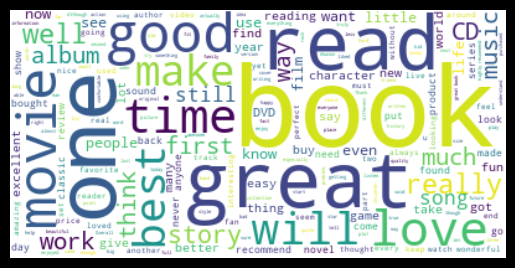

In [517]:
positive_reviews = ' '.join(amazon.review[amazon.score==1])
cloud_positives = WordCloud(background_color='white').generate(positive_reviews)
plt.imshow(cloud_positives, interpolation='bilinear') 
plt.axis("off")
plt.show()

In [521]:
word_tokens = [word_tokenize(review) for review in amazon.review]
amazon['n_words'] = [len(word_token) for word_token in word_tokens]

Building a tfidf vectorizer

In [529]:
amazon.head()

,score,review,n_words,language
0,1,Stuning even for the non-gamer: This sound tr...,87,en
1,1,The best soundtrack ever to anything.: I'm re...,109,en
2,1,Amazing!: This soundtrack is my favorite musi...,165,en
3,1,Excellent Soundtrack: I truly like this sound...,145,en
4,1,"Remember, Pull Your Jaw Off The Floor After H...",109,en


In [534]:
vect = TfidfVectorizer(stop_words=list(ENGLISH_STOP_WORDS), ngram_range=(1, 2), max_features=200, token_pattern=r'\b[^\d\W][^\d\W]+\b').fit(amazon.review)
X = vect.transform(amazon.review)
reviews_transformed = pd.DataFrame(X.A, columns=vect.get_feature_names_out())
reviews_transformed = pd.concat([amazon[['n_words']],
                                 reviews_transformed], axis=1)
reviews_transformed

,n_words,able,action,actually,ago,album,amazing,amazon,author,away,...,work,works,world,worst,worth,writing,written,wrong,year,years
0,87,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.274041,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
1,109,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.219408,0.0,0.0,0.0,0.0,0.208885
2,165,0.0,0.0,0.0,0.0,0.0,0.382773,0.000000,0.000000,0.000000,...,0.142935,0.0,0.0,0.0,0.160089,0.0,0.0,0.0,0.0,0.152410
3,145,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
4,109,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,175,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.308646,0.000000,...,0.000000,0.0,0.0,0.0,0.143748,0.0,0.0,0.0,0.0,0.000000
9996,153,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.211433,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
9997,122,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.261721,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
9998,33,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000


Building a classifier

In [536]:
# Define X and y
y = amazon.score
X = reviews_transformed

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=456)

# Train a logistic regression
log_reg = LogisticRegression(max_iter=300).fit(X_train, y_train)
# Predict the labels
y_predicted = log_reg.predict(X_test)

# Print accuracy score and confusion matrix on test set
print('Accuracy on the test set: ', accuracy_score(y_test, y_predicted))
print(confusion_matrix(y_test, y_predicted)/len(y_test))

Accuracy on the test set:  0.7885
[[0.4105 0.1155]
 [0.096  0.378 ]]
